In [6]:
# basic libraries
import os               # a system library, not related to algorithm          
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image
from image_aug_methods import clipped_zoom, flip_images
import tifffile as tiff

# state control
state = 1
np.random.seed(state)

# To plot pretty figures
import seaborn as sns  # just a plot library. Not related to algorithms
%matplotlib inline
plt.style.use('seaborn')
sns.set(style="ticks", color_codes=True)

# Directories
PROJECT_ROOT_PATH = '/media/tulan/Linux/Pycharm/EM Cell Tracking/'
DATA_PATH = '/media/tulan/Linux/Pycharm/EM Cell Tracking/data/'
MODEL_PATH = '/media/tulan/Linux/Pycharm/EM Cell Tracking/model/'
LOG_PATH = '/media/tulan/Linux/Pycharm/EM Cell Tracking/log/'
WEIGHT_PATH = '/media/tulan/Linux/Pycharm/EM Cell Tracking/weight/'
RESULT_PATH = '/media/tulan/Linux/Pycharm/EM Cell Tracking/result/'

In [2]:
X_train = np.load(DATA_PATH + 'X_train_ori.npy')
y_train = np.load(DATA_PATH + 'y_train_ori.npy')
X_test = np.load(DATA_PATH + 'X_test.npy')
X_train.shape, y_train.shape, X_test.shape

((30, 512, 512, 1), (30, 512, 512, 1), (30, 512, 512, 1))

In [4]:
flipped_image = flip_images(X_train, (512, 512), 1)
flipped_label = flip_images(y_train, (512, 512), 1)
flipped_image.shape, flipped_label.shape

((90, 512, 512, 1), (90, 512, 512, 1))

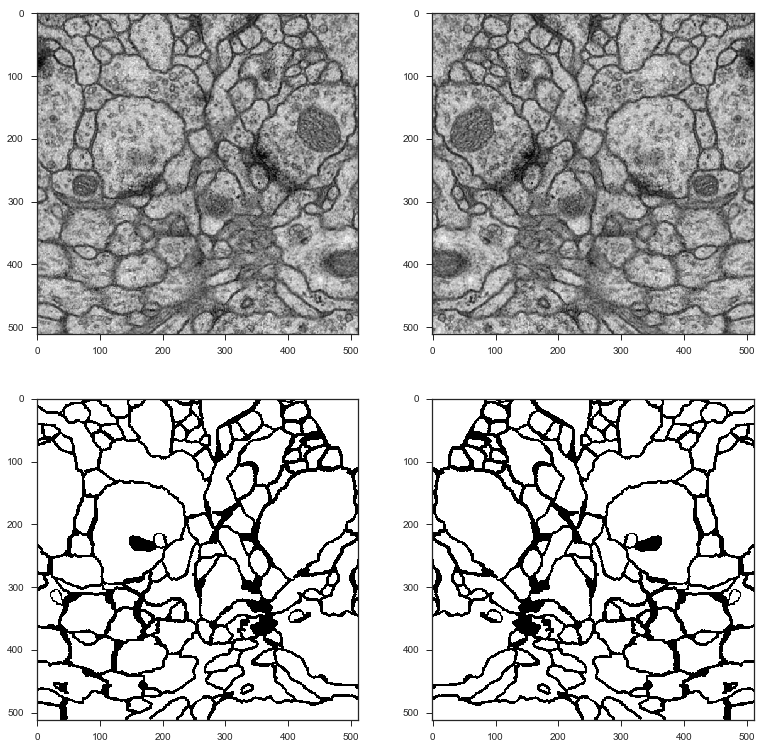

In [7]:
plt.figure(figsize=(13,13))

plt.subplot(2, 2, 1)
plt.imshow(X_train[0].reshape(512, 512), cmap='gray')
plt.subplot(2, 2, 2)
plt.imshow(flipped_image[0].reshape(512, 512), cmap='gray')
plt.subplot(2, 2, 3)
plt.imshow(y_train[0].reshape(512, 512), cmap='binary')
plt.subplot(2, 2, 4)
plt.imshow(flipped_label[0].reshape(512, 512), cmap='binary')
plt.show()

In [8]:
X_train_aug = np.concatenate([X_train, flipped_image], axis=0)
y_train_aug = np.concatenate([y_train, flipped_label], axis=0)
X_train_aug.shape, y_train_aug.shape

((120, 512, 512, 1), (120, 512, 512, 1))

In [9]:
np.save(DATA_PATH + 'X_train_aug_flip.npy', X_train_aug)
np.save(DATA_PATH + 'y_train_aug_flip.npy', y_train_aug)

In [10]:
scaled_image_1 = clipped_zoom(X_train, 1.1)
scaled_image_2 = clipped_zoom(X_train, 1.2)
scaled_image_3 = clipped_zoom(X_train, 1.3)
scaled_image_4 = clipped_zoom(X_train, 1.4)
scaled_image_5 = clipped_zoom(X_train, 1.5)
scaled_image_6 = clipped_zoom(X_train, 1.6)
scaled_label_1 = clipped_zoom(y_train, 1.1)
scaled_label_2 = clipped_zoom(y_train, 1.2)
scaled_label_3 = clipped_zoom(y_train, 1.3)
scaled_label_4 = clipped_zoom(y_train, 1.4)
scaled_label_5 = clipped_zoom(y_train, 1.5)
scaled_label_6 = clipped_zoom(y_train, 1.6)
scaled_image_1.shape, scaled_label_1.shape

/home/tulan/anaconda2/lib/python2.7/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


((30, 512, 512, 1), (30, 512, 512, 1))

In [11]:
X_train_aug.shape, scaled_image_1.shape, scaled_image_2.shape,\
scaled_image_3.shape, scaled_image_4.shape, scaled_image_5.shape, scaled_image_6.shape, scaled_label_5.shape

((120, 512, 512, 1),
 (30, 512, 512, 1),
 (30, 512, 512, 1),
 (30, 512, 512, 1),
 (30, 512, 512, 1),
 (30, 512, 512, 1),
 (30, 512, 512, 1),
 (30, 512, 512, 1))

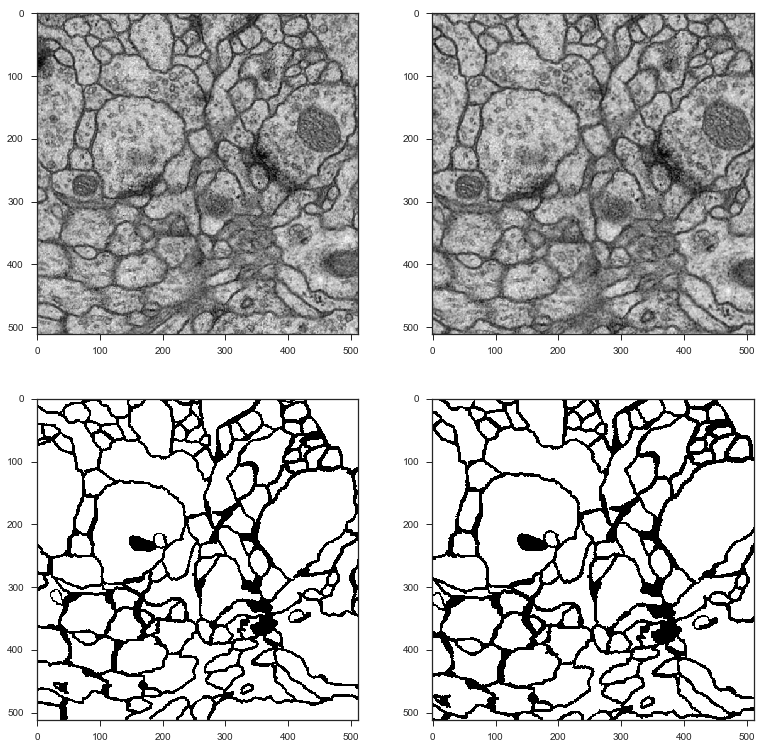

In [12]:
plt.figure(figsize=(13,13))

plt.subplot(2, 2, 1)
plt.imshow(X_train[0].reshape(512, 512), cmap='gray')
plt.subplot(2, 2, 2)
plt.imshow(scaled_image_1[0].reshape(512, 512), cmap='gray')
plt.subplot(2, 2, 3)
plt.imshow(y_train[0].reshape(512, 512), cmap='binary')
plt.subplot(2, 2, 4)
plt.imshow(scaled_label_1[0].reshape(512, 512), cmap='binary')
plt.show()

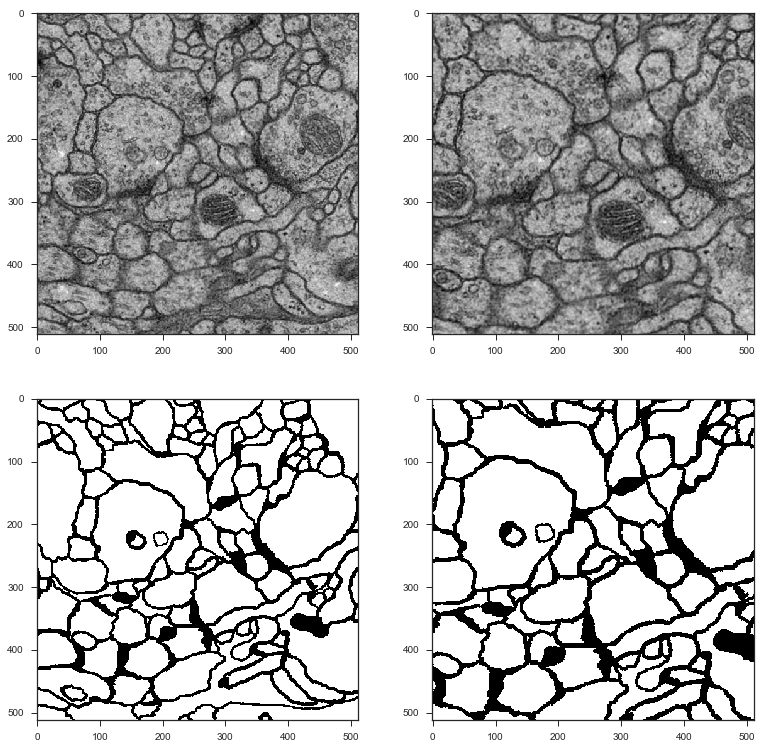

In [13]:
plt.figure(figsize=(13,13))

plt.subplot(2, 2, 1)
plt.imshow(X_train[1].reshape(512, 512), cmap='gray')
plt.subplot(2, 2, 2)
plt.imshow(scaled_image_3[1].reshape(512, 512), cmap='gray')
plt.subplot(2, 2, 3)
plt.imshow(y_train[1].reshape(512, 512), cmap='binary')
plt.subplot(2, 2, 4)
plt.imshow(scaled_label_3[1].reshape(512, 512), cmap='binary')
plt.show()

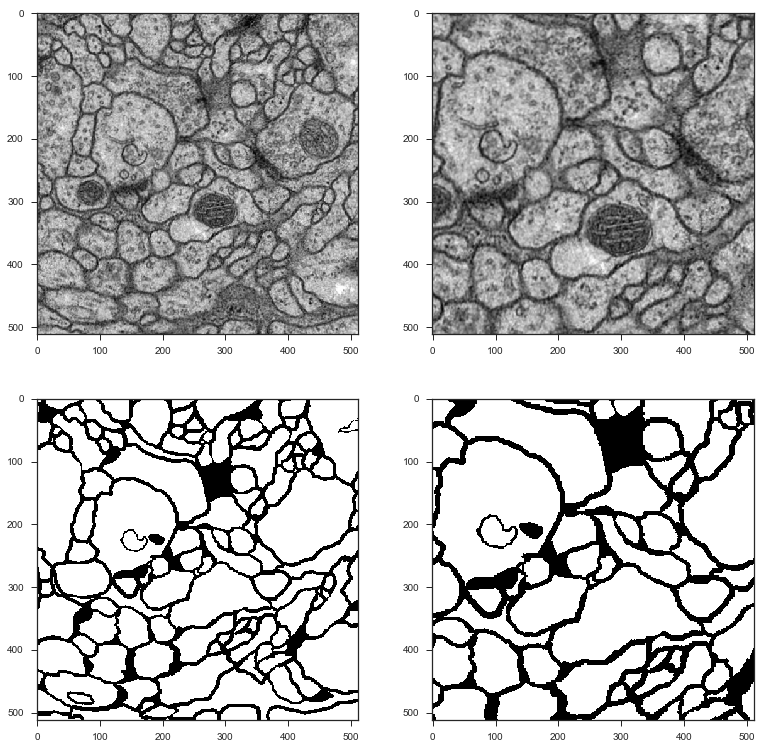

In [14]:
plt.figure(figsize=(13,13))

plt.subplot(2, 2, 1)
plt.imshow(X_train[2].reshape(512, 512), cmap='gray')
plt.subplot(2, 2, 2)
plt.imshow(scaled_image_5[2].reshape(512, 512), cmap='gray')
plt.subplot(2, 2, 3)
plt.imshow(y_train[2].reshape(512, 512), cmap='binary')
plt.subplot(2, 2, 4)
plt.imshow(scaled_label_5[2].reshape(512, 512), cmap='binary')
plt.show()

In [15]:
X_train_aug = np.concatenate([X_train_aug, scaled_image_1, scaled_image_2, 
                              scaled_image_3, scaled_image_4, scaled_image_5, 
                              scaled_image_6], axis=0)
y_train_aug = np.concatenate([y_train_aug, scaled_label_1, scaled_label_2, 
                              scaled_label_3, scaled_label_4, scaled_label_5,
                              scaled_label_6], axis=0)
X_train_aug = X_train_aug.astype(np.uint8)
y_train_aug = y_train_aug.astype(np.uint8)
X_train_aug.shape, y_train_aug.shape

((300, 512, 512, 1), (300, 512, 512, 1))

In [16]:
np.save(DATA_PATH + 'X_train_flip_scale.npy', X_train_aug)
np.save(DATA_PATH + 'y_train_flip_scale.npy', y_train_aug)